# Drought indices


In [2]:
# import packages
import pandas as pd
from matplotlib import pyplot as plt

from pastas.stats import sgi


In [3]:
# get head time series
fileurl = "https://raw.githubusercontent.com/pastas/pastas/master/doc/examples/data"
dataset = pd.read_csv(f"{fileurl}/head_nb1.csv", index_col=0, parse_dates=True)

series = pd.Series(dataset["head"] * 100.0, dtype="int64")


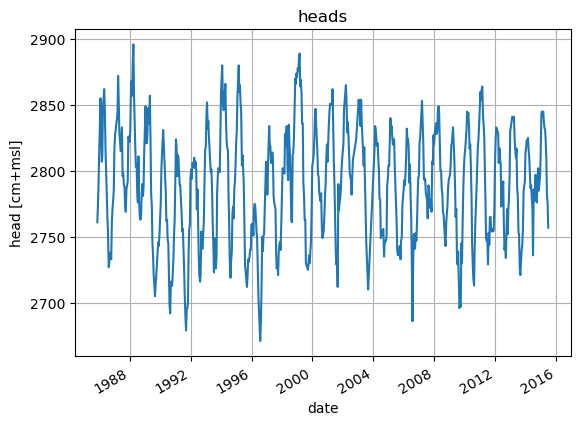

In [4]:
# plot head time series
series.plot(title="heads", ylabel="head [cm+msl]", grid=True)
plt.show()


The Z-score (or standard score) provides a way of creating dimensionless values which shows relative wet and dry periods.

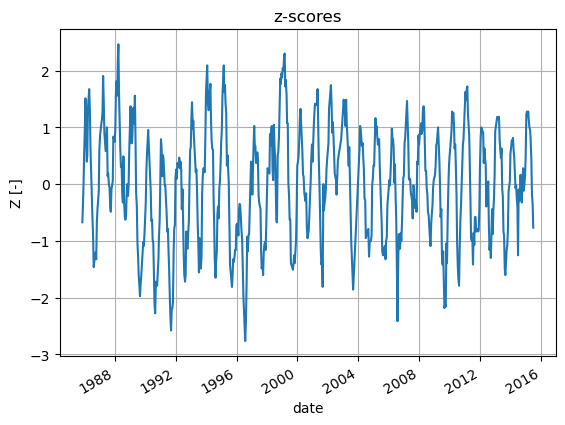

In [5]:
zSer = (series - series.mean()) / series.std()
zSer.plot(title="z-scores", ylabel="Z [-]", grid=True)
plt.show()

The Z-score gives deviations from the mean. However, when there is a strong seasonal variation, we would like to see the deviations relative to the seasonal pattern. The Standardized Groundwater Index proposed by Bloomfield and Marchant (2013) by default scales values per month (SGI-1).

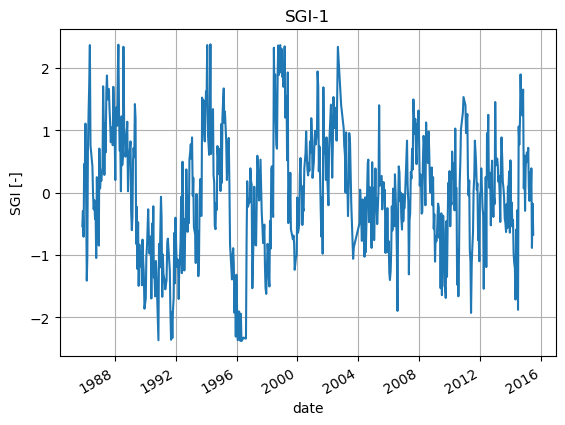

In [7]:
sgiSer = sgi(series)
sgiSer.plot(title="SGI-1", ylabel="SGI [-]", grid=True)
plt.show()

Where Z-score showed winters as wet and summers as dry, the SGI-1 shows which heads are relatively high or low for what is normal in the corresponding month.

Instead of using one month as aggregation period, it is possible to use 2 months (jan-feb, mrt-apr, etc.) or 3 months (jan-feb-mar, apr-may-jun, etc.) as aggregation period.

In order to see the difference, we zoom into a single year, 1996.

TypeError: sgi() got an unexpected keyword argument 'period'

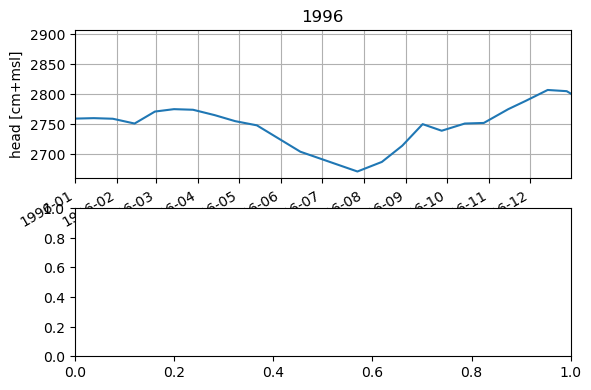

In [8]:
plt.figure()
ax = plt.subplot(2, 1, 1)
series.plot(title="1996", ylabel="head [cm+msl]", grid=True, ax=ax)
plt.xlim(pd.Timestamp("1-1-1996"), pd.Timestamp("31-12-1996"))
ax = plt.subplot(2, 1, 2)
for period in [1, 2, 3]:
    aLab = "SGI-" + str(period)
    sgiSer = sgi(series, period=period)
    sgiSer.plot(label=aLab, ax=ax)
plt.ylabel("SGI [-]")
plt.grid(True)
plt.legend()
plt.xlim(pd.Timestamp("1-1-1996"), pd.Timestamp("31-12-1996"))
plt.tight_layout()
plt.show()